In [1]:
import pandas as pd
import numpy as np
import logging
from scipy import stats
from io import StringIO
import logging

In [2]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.modelo_360.nodes as model_360
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Create a string buffer to capture log output
log_capture_string = StringIO()
ch = logging.StreamHandler(log_capture_string)
ch.setLevel(logging.INFO)
logger.addHandler(ch)

In [5]:
%load_ext kedro.ipython

[03/19/25 17:01:36] INFO     Resolved project path as:                                              ]8;id=6289;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=558032;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/19/25 17:01:36] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=680845;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=328077;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[03/19/25 17:01:37] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=952556;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=168688;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=929374;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=383913;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=971364;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=818928;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=198271;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=156775;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### Construccion de metricas historicas:

In [7]:
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [8]:
dictt = pd.read_pickle('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/VIV/09-backtesting/insumo_modelo_360_sin_eda_t3_202411.pickle')

In [9]:
dictt.keys()

dict_keys([1, 2, 3, 'Combined'])

In [10]:
dictt[1]['Discriminacion']

,N,xN,COLUMN,% Aciertos,pend,Decil Pend,Decil Suavizado,Decil Categoria
0,10.000,1000,10000.0,5.7037,0.570370,10,10.0,10.0
1,25.000,1000,25000.0,13.1309,0.495147,10,10.0,10.0
2,40.000,1000,40000.0,18.1371,0.333747,9,9.0,9.0
3,60.000,1000,60000.0,24.7435,0.330320,8,8.0,8.0
4,80.000,1000,80000.0,32.2528,0.375465,9,8.0,8.0
5,100.000,1000,100000.0,36.4382,0.209270,7,7.0,7.0
6,120.000,1000,120000.0,41.4034,0.248260,8,7.0,7.0
7,140.000,1000,140000.0,45.6299,0.211325,7,7.0,7.0
8,160.000,1000,160000.0,48.7895,0.157980,6,6.0,6.0
9,180.000,1000,180000.0,51.5798,0.139515,6,6.0,6.0


In [8]:
ruta1 = 's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/VIV/09-backtesting/'

archivos_360 = {
    '202410':'',
    '202411':'insumo_modelo_360_sin_eda_t3_202411.pickle',
    '202412':'insumo_modelo_360_sin_eda_t3_202412.pickle'
}

archivos_backtesting = {
    '202410':'save_backtesting_sin_eda_t3_202410.pickle',
    '202411':'save_backtesting_sin_eda_t3_202411.pickle',
    '202412':'save_backtesting_sin_eda_t3_202412.pickle'
}


In [9]:
ruta = 's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/TC/09-backtesting/'

archivos_360 = {
    '202401':'', # viv
    '202407':'',# viv
    '202408':'insumo_modelo_360_sin_eda_t3_202411.pickle', # viv
    '202409':'insumo_modelo_360_sin_eda_t3_202412.pickle', # viv
    '202410':'insumo_modelo_360_sin_eda_t3_202412.pickle', 
    '202411':'insumo_modelo_360_new_t3_v3_1_202411.pickle',
    '202412':'insumo_modelo_360_new_t3_v3_1_202412.pickle'
}

archivos_backtesting = {
    '202401':'save_backtesting_sin_eda_t3_202410.pickle', # viv
    '202407':'save_backtesting_sin_eda_t3_202410.pickle', # viv
    '202408':'save_backtesting_sin_eda_t3_202411.pickle', # viv
    '202409':'save_backtesting_sin_eda_t3_202412.pickle',# viv
    '202410':'save_backtesting_new_t3_v2_0_202410.pickle', # tc viejo
    '202411':'save_backtesting_new_t3_v3_1_202411.pickle', # tc produccion
    '202412':'save_backtesting_new_t3_v3_1_202412.pickle' # tc produccion
}

In [10]:
cortes_totales = list(archivos_backtesting.keys())+list(archivos_360.keys())
cortes_totales = sorted(list(set(cortes_totales)))
insumos_ordenamiento = {}
for corte in cortes_totales:
    try:
        archivo = archivos_360[corte]
        try:
            ruta_corte = f'{ruta}{archivo}'
            insumos_360 = pd.read_pickle(ruta_corte)
        except:
            ruta_corte = f'{ruta1}{archivo}'
            insumos_360 = pd.read_pickle(ruta_corte)
        logger.info(f'Ok insumo de ordenamiento para el corte {corte}')
    except:
        logger.info(f'No encontramos el insumo de ordenamiento y por esto cargaremos el backtesting de {corte}.')
        logger.info(f'Calculando los insumos de ordenamiento...')
        archivo = archivos_backtesting[corte]
        try:
            ruta_corte = f'{ruta}{archivo}'
            backtesting_corte = pd.read_pickle(ruta_corte)
        except:
            ruta_corte = f'{ruta1}{archivo}'
            backtesting_corte = pd.read_pickle(ruta_corte)
        insumos_360 = backtesting.modelo_360_full(backtesting_corte, params)
    finally:
        insumos_ordenamiento[corte] = insumos_360
        logger.info('------------------')

[03/10/25 13:02:20] INFO     No encontramos el insumo de ordenamiento y por esto cargaremos el     ]8;id=598167;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=526090;file:///tmp/ipykernel_323/3716938194.py#15\15]8;;\
                             backtesting de 202401.                                                                

                    INFO     Calculando los insumos de ordenamiento...                             ]8;id=467574;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=232597;file:///tmp/ipykernel_323/3716938194.py#16\16]8;;\

[03/10/25 13:05:38] INFO     Iniciando insumo modelo 360 t-1                                           ]8;id=585829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=888286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-1                                         ]8;id=206836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=536544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-2                                           ]8;id=323764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=596392;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-2                                         ]8;id=156033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=780245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-3                                           ]8;id=3628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=546323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-3                                         ]8;id=468969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=499827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-Combined                                    ]8;id=293735;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=448019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-Combined                                  ]8;id=137165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=880567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     ------------------                                                    ]8;id=905494;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=752252;file:///tmp/ipykernel_323/3716938194.py#27\27]8;;\

                    INFO     No encontramos el insumo de ordenamiento y por esto cargaremos el     ]8;id=426677;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=242796;file:///tmp/ipykernel_323/3716938194.py#15\15]8;;\
                             backtesting de 202407.                                                                

                    INFO     Calculando los insumos de ordenamiento...                             ]8;id=434261;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=410523;file:///tmp/ipykernel_323/3716938194.py#16\16]8;;\

[03/10/25 13:08:41] INFO     Iniciando insumo modelo 360 t-1                                           ]8;id=543956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=973672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-1                                         ]8;id=794375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=18707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-2                                           ]8;id=114899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=345173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-2                                         ]8;id=240876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=54576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-3                                           ]8;id=29561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=154489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-3                                         ]8;id=831289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=167011;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-Combined                                    ]8;id=484920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=613981;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-Combined                                  ]8;id=199155;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=39602;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     ------------------                                                    ]8;id=544317;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=773414;file:///tmp/ipykernel_323/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202408                        ]8;id=58150;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=256051;file:///tmp/ipykernel_323/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=561584;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=699184;file:///tmp/ipykernel_323/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202409                        ]8;id=295689;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=151907;file:///tmp/ipykernel_323/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=281677;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=690945;file:///tmp/ipykernel_323/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202410                        ]8;id=298199;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=370971;file:///tmp/ipykernel_323/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=360954;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=724212;file:///tmp/ipykernel_323/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202411                        ]8;id=609837;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=102983;file:///tmp/ipykernel_323/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=960757;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=346145;file:///tmp/ipykernel_323/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202412                        ]8;id=400996;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=869705;file:///tmp/ipykernel_323/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=171409;file:///tmp/ipykernel_323/3716938194.py\3716938194.py]8;;\:]8;id=508627;file:///tmp/ipykernel_323/3716938194.py#27\27]8;;\

In [233]:
insumos_ordenamiento.keys()

dict_keys(['202401', '202407', '202408', '202409', '202410', '202411', '202412'])

In [234]:
insumos_ordenados = {}
for corte in cortes_totales:
    print(corte)
    for t in insumos_ordenamiento[corte].keys():
        bd = insumos_ordenamiento[corte][t]['Discriminacion']
        bd['Corte'] = int(corte)
        if t not in insumos_ordenados:
            insumos_ordenados[t] = {}
            bd_full = bd.copy()
        else:
            bd_full = insumos_ordenados[t]
            bd_full = pd.concat([bd_full, bd] , axis = 0)
        insumos_ordenados[t] =  bd_full

202401
202407
202408
202409
202410
202411
202412


In [235]:
insumos_ordenados.keys()

dict_keys([1, 2, 3, 'Combined'])

In [421]:
y_name = 'N'
x_name = 'Corte'
z_name = '% Aciertos'
rezago = 2
corte_ventana_movil = '202411' # el pernultimo mes
corte_actual = '202412'
corte_produccion = '202401'
nivel_aceptabilidad = 3 # en desviaciones estandar
nodos = [40.000,80.000,308.346,616.175,924.263]
periodos_ventana_corta = 3
periodos_ventana_larga = 6

In [422]:
cortes_totales2 = cortes_totales.copy()
sub_bd = insumos_ordenados[rezago]
if (x_name == 'N') | (y_name == 'N'):
    adj_value = sub_bd['xN'].iloc[0]
else:
    adj_value = 1

sub_bd = sub_bd.sort_values(by='N')
sub_bd.index = range(sub_bd.shape[0])
x = sub_bd[x_name].drop_duplicates()
y = sub_bd[y_name].drop_duplicates()
if x_name == 'Corte':
    ciclo1 = x.copy()
    ciclo2 = y.copy()
elif y_name == 'Corte':
    ciclo1 = y.copy()
    ciclo2 = x.copy()

z = pd.DataFrame(index = x, columns = y)
if x_name in ['COLUMN','N']:
    for tt in y:
        z[f'{tt}_N'] = None
else:
    for t in x:
        z.loc[f'{t}_N'] = None

errores = []
for t in ciclo1:
    sub_bd_filt = sub_bd[sub_bd[x_name] == t]
    for tt in ciclo2:
        sub_bd_filt3 = sub_bd_filt[sub_bd_filt[y_name] == tt]
        sub_bd_filt2 = sub_bd_filt3[z_name]
        if sub_bd_filt2.shape[0] == 1:
            z.loc[t,tt] = sub_bd_filt2.iloc[0]
            if x_name in ['COLUMN','N']:
                z.loc[t,f'{tt}_N'] = sub_bd_filt3[['N','xN']].prod(axis  =1).iloc[0]
            else:
                z.loc[f'{t}_N',tt] = sub_bd_filt3[['N','xN']].prod(axis  =1).iloc[0]
        else:
            #logger.info(f'Se evidencia problemas en el corte y ordenamiento {t},{tt}:')
            #logger.info(sub_bd_filt2)
            if x_name in ['COLUMN','N']:
                z.loc[t,f'{tt}_N'] = t*adj_value
                if tt not in errores:
                    errores.append(tt)
            else:
                z.loc[f'{t}_N',tt] = tt*adj_value
                if t not in errores:
                    errores.append(t)
errores = sorted(errores)
for adj in errores:
    logger.info(f'Interpolando el corte {adj} en el rezago de informacion {rezago}')
    if x_name in ['COLUMN','N']:
        metrica_nulos = z[adj].astype(float)
        n_obs = z[f'{adj}_N'].astype(float)
    else:
        metrica_nulos = z.loc[adj].astype(float)
        n_obs = z.loc[f'{adj}_N'].astype(float)
    metrica_nulos = np.log(metrica_nulos)
    metrica_nulos = metrica_nulos.replace(np.inf,0)
    metrica_nulos = metrica_nulos.replace(-np.inf,0)
    # Identificar los índices que no son NaN
    valid_indices = metrica_nulos.dropna().index
    
    # Interpolar usando el método de interpolación lineal
    f_interp = spi.interp1d(n_obs.loc[valid_indices],metrica_nulos.loc[valid_indices], kind='quadratic', fill_value="extrapolate")
    
    # Crear nuevos valores interpolados
    y_interp = f_interp(n_obs)
    for t,pos in enumerate(metrica_nulos.index):
        if metrica_nulos.isnull().loc[pos] == True:
            metrica_nulos.loc[pos] = y_interp[t]
    metrica_nulos = np.exp(metrica_nulos)
    if x_name in ['COLUMN','N']:
        z[adj] = metrica_nulos
    else:
        z.loc[adj] = metrica_nulos

for adj in cortes_totales:
    if x_name in ['COLUMN','N']:
        z = z.drop([f'{adj}_N'], axis = 1)
    else:
        z = z.drop([f'{adj}_N'], axis = 0)

z = z.astype(float)
z1 = z.T
if x_name in ['COLUMN','N']:
    x = x.astype(float)
    y = y.astype(int)
else:
    x = x.astype(int)
    y = y.astype(float)
x = x.sort_values()
try:
    z1 = z1[x.values]
except:
    z1 = z1[cortes_totales]
x = x[~x.isin([corte_produccion, int(corte_produccion)])]
if corte_produccion in cortes_totales2:
    cortes_totales2.remove(corte_produccion)
x1, y1 = np.meshgrid(x, y)

[03/11/25 14:01:10] INFO     Interpolando el corte 202401 en el rezago de informacion 2             ]8;id=2849;file:///tmp/ipykernel_323/960928700.py\960928700.py]8;;\:]8;id=151048;file:///tmp/ipykernel_323/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202407 en el rezago de informacion 2             ]8;id=851538;file:///tmp/ipykernel_323/960928700.py\960928700.py]8;;\:]8;id=118378;file:///tmp/ipykernel_323/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202408 en el rezago de informacion 2             ]8;id=529082;file:///tmp/ipykernel_323/960928700.py\960928700.py]8;;\:]8;id=250961;file:///tmp/ipykernel_323/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202409 en el rezago de informacion 2             ]8;id=408243;file:///tmp/ipykernel_323/960928700.py\960928700.py]8;;\:]8;id=590813;file:///tmp/ipykernel_323/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202410 en el rezago de informacion 2             ]8;id=650088;file:///tmp/ipykernel_323/960928700.py\960928700.py]8;;\:]8;id=926194;file:///tmp/ipykernel_323/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202411 en el rezago de informacion 2             ]8;id=125025;file:///tmp/ipykernel_323/960928700.py\960928700.py]8;;\:]8;id=257318;file:///tmp/ipykernel_323/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202412 en el rezago de informacion 2             ]8;id=421740;file:///tmp/ipykernel_323/960928700.py\960928700.py]8;;\:]8;id=839483;file:///tmp/ipykernel_323/960928700.py#52\52]8;;\

In [423]:
print(x1.shape)
print(y1.shape)
print(z1.shape)

(32, 6)
(32, 6)
(32, 7)


In [424]:
z1

Corte,202401,202407,202408,202409,202410,202411,202412
N,,,,,,,
10.000,6.032000,6.032000,6.032000,6.940200,6.940200,1.121000,1.040900
25.000,14.033600,14.033600,14.033600,12.730100,12.730100,2.561100,2.153400
40.000,19.819500,19.819500,19.819500,18.519900,18.519900,3.861100,3.337300
60.000,28.559700,28.559700,28.559700,23.082800,23.082800,5.418000,4.783500
80.000,34.837900,34.837900,34.837900,29.026100,29.026100,6.772500,6.253500
100.000,39.967200,39.967200,39.967200,32.630400,32.630400,8.080300,7.477200
120.000,45.096400,45.096400,45.096400,36.388000,36.388000,9.185700,8.470400
140.000,48.256100,48.256100,48.256100,40.337400,40.337400,10.439000,9.487500
160.000,51.538800,51.538800,51.538800,43.136500,43.136500,11.474400,10.584000


### Alertas:

In [425]:
try:
    z_actual = z1[corte_actual]
except:
    z_actual = z1[int(corte_actual)]

try:
    z_inicial = z1[corte_produccion]
except:
    z_inicial = z1[int(corte_produccion)]    

In [426]:
z2 = z1.drop([z_inicial.name], axis = 1)
z2_ventanas = z2.drop([z_actual.name], axis = 1)
if periodos_ventana_larga> np.min([periodos_ventana_larga,z2_ventanas.shape[1]]):
    periodos_ventana_larga = np.min([periodos_ventana_larga,z2_ventanas.shape[1]])
    logger.info(f'Ventana de largo plazo muy grande. Se ajustara a {periodos_ventana_larga} periodos')
ventana_larga = z2_ventanas.T.rolling(window=periodos_ventana_larga).mean().T
ventana_larga_std = z2_ventanas.T.rolling(window=periodos_ventana_larga).std().T
ventana_corta = z2_ventanas.T.rolling(window=periodos_ventana_corta).mean().T
ventana_corta_std = z2_ventanas.T.rolling(window=periodos_ventana_corta).std().T
ventana_corta

[03/11/25 14:01:12] INFO     Ventana de largo plazo muy grande. Se ajustara a 5 periodos            ]8;id=625307;file:///tmp/ipykernel_323/2969288281.py\2969288281.py]8;;\:]8;id=100640;file:///tmp/ipykernel_323/2969288281.py#5\5]8;;\

Corte,202407,202408,202409,202410,202411
N,,,,,
10.000,NaN,NaN,6.334733,6.637467,5.000467
25.000,NaN,NaN,13.599100,13.164600,9.340433
40.000,NaN,NaN,19.386300,18.953100,13.633633
60.000,NaN,NaN,26.734067,24.908433,17.194533
80.000,NaN,NaN,32.900633,30.963367,21.608233
100.000,NaN,NaN,37.521600,35.076000,24.447033
120.000,NaN,NaN,42.193600,39.290800,27.320567
140.000,NaN,NaN,45.616533,42.976967,30.371267
160.000,NaN,NaN,48.738033,45.937267,32.582467


In [427]:
try:
    ventana_larga2 = ventana_larga[corte_ventana_movil]
except:
    ventana_larga2 = ventana_larga[int(corte_ventana_movil)]
try:
    ventana_larga_std2 = ventana_larga_std[corte_ventana_movil]
except:
    ventana_corta_std2 = ventana_larga_std[int(corte_ventana_movil)]
try:
    ventana_corta2 = ventana_corta[corte_ventana_movil]
except:
    ventana_corta2 = ventana_corta[int(corte_ventana_movil)]
try:
    ventana_corta_std2 = ventana_corta_std[corte_ventana_movil]
except:
    ventana_corta_std2 = ventana_corta_std[int(corte_ventana_movil)]

In [428]:
std_used = pd.concat([ventana_corta_std2,ventana_corta_std2,ventana_corta.std(axis = 1).to_frame().rename(columns={0:ventana_corta_std2.name})], axis = 1)
std_used = std_used.max(axis = 1)
alerta_modelo = ventana_larga2-nivel_aceptabilidad*std_used
alerta_modelo


N
10.000      -4.666070
25.000      -6.395525
40.000      -9.281806
60.000      -8.855731
80.000     -11.644266
100.000    -11.866921
120.000    -12.684866
140.000    -14.260348
160.000    -14.675366
180.000    -16.034302
200.000    -16.437248
220.000    -16.230812
308.087    -15.056773
308.346    -15.052124
616.175     -6.181149
616.692     -6.162969
924.263      5.354571
925.038      5.382136
1232.351    14.631527
1233.384    14.658544
1540.439    21.681528
1541.730    21.706915
1848.527    26.673630
1850.076    26.694169
2156.615    29.942692
2158.422    29.957727
2464.703    32.028009
2466.768    32.041184
2772.791    33.929687
2775.114    33.941462
3080.879    35.005285
3083.460    35.010109
dtype: float64

## Alerta de cambio de estructura de datos

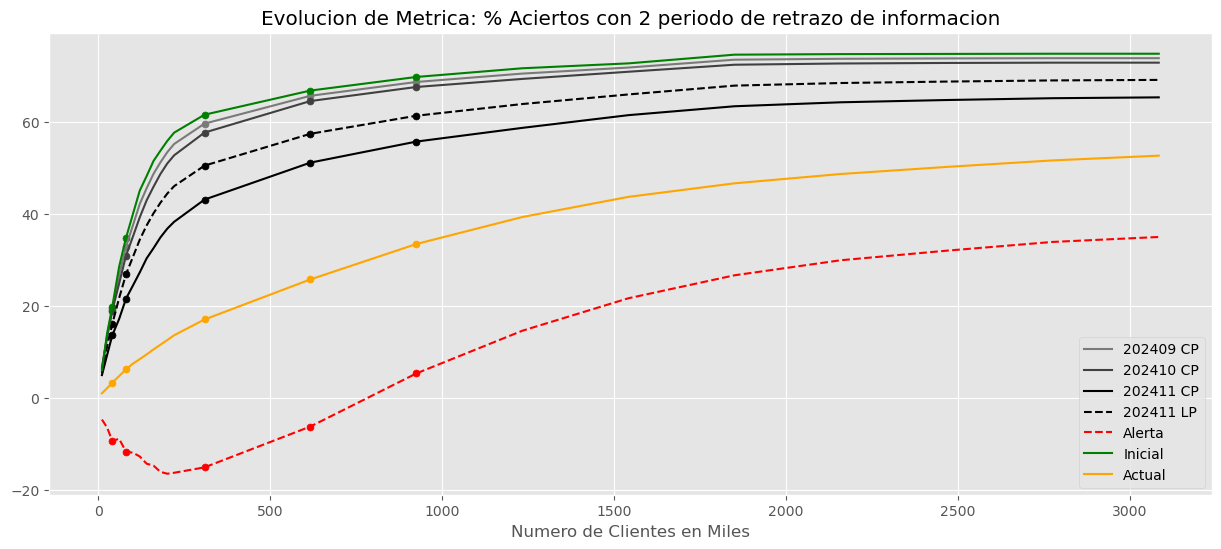

In [429]:
# Crear el gráfico
plt.figure(figsize=(15, 6))
plt.style.use('ggplot')
# Usar un mapa de colores de tonos grises (puedes ajustar el número de colores según el número de columnas)
colors = plt.cm.Greys(np.linspace(0.2, 1, ventana_corta.shape[1]))  # Degradado de gris

# Graficar cada columna con un color diferente
for i, column in enumerate(ventana_corta.columns):
    if ventana_corta[column].dropna().shape[0] == 0:
        pass
    else:
        plt.plot(ventana_corta.index, ventana_corta[column], label=str(column)+' CP', color=colors[i])
        plt.scatter(nodos,ventana_corta.loc[nodos, column], color = colors[i], s = 25)
    if str(corte_ventana_movil) != str(column):
        pass
    else:
        plt.plot(ventana_larga.index, ventana_larga[column], label=str(column)+' LP', color=colors[i], linestyle = '--')
        plt.scatter(nodos,ventana_larga.loc[nodos, column],color = colors[i], s = 25)

plt.plot(alerta_modelo.index, alerta_modelo.values, label = 'Alerta', color='red', linestyle = '--')
plt.scatter(nodos,alerta_modelo.loc[nodos].values,color='red', s = 25)

for z_plot,label,col in [[z_inicial,'Inicial','green'],[z_actual,'Actual','orange']]:
    plt.plot(z_plot.index,z_plot.values, label = [label], color = col)
    plt.scatter(nodos,z_plot.loc[nodos],color = col, s = 25)
# Agregar leyenda
plt.legend()
# Mostrar el gráfico
plt.title(f'Evolucion de Metrica: {z_name} con {rezago} periodo de retrazo de informacion')
plt.xlabel(f'Numero de Clientes en Miles')
plt.show()

In [430]:
# cuando la ventana corta es < ventana larga
logger.info(f'Analisis en los cambios de la estructura de los datos...')
cond = ventana_corta2[(ventana_corta2 < ventana_larga2)]
logger.info(f'Validando los nodos del ordenamiento con la ventana corta de {periodos_ventana_corta} periodos que estan por debajo de la ventana larga de {periodos_ventana_larga} periodos. ')
movimiento1 = (z_actual / ventana_corta2 -1)*100
movimiento = movimiento.loc[cond.index]
logger.info(f'Ultimo Backtesting vs {periodos_ventana_corta} periodos:')
logger.info(f'% Movimiento sobre los nodos de interes')
logger.info(movimiento1.loc[movimiento1.index[movimiento1.index.isin(nodos)]].to_frame())
movimiento = movimiento[movimiento<0]
if movimiento.shape[0]>0:
    logger.info(f'Caida maxima: {np.round(movimiento.min(),3)}%. Nodo: {movimiento.idxmin(axis = 0)}')
    logger.info(f'Caida minima: {np.round(movimiento.max(),3)}%. Nodo: {movimiento.idxmax(axis = 0)}')
else:
    logger.info(f'No hubo caida del modelo a lo largo de la curva')
logger.info(f'--------')
logger.info(f'Ordenamiento del ultimo Backtesting vs el nivel de la alerta permitida')
alerta_generada = (z_actual/alerta_modelo-1)*100
alerta_generada2 = alerta_generada[alerta_generada<0]
alerta_generada2 = alerta_generada2.to_frame().rename(columns= {0:'Actual vs Alerta'})
if alerta_generada2.shape[0] == 0:
    logger.info(f'No hubo alerta generada')
else:
    logger.info(f'% Deficiencia del modelo: (Backtesting_t /Alerta -1)*100 :')
    logger.info(alerta_generada2)

[03/11/25 14:01:35] INFO     Analisis en los cambios de la estructura de los datos...               ]8;id=932877;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=385919;file:///tmp/ipykernel_323/1548191959.py#2\2]8;;\

                    INFO     Validando los nodos del ordenamiento con la ventana corta de 3         ]8;id=57546;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=607500;file:///tmp/ipykernel_323/1548191959.py#4\4]8;;\
                             periodos que estan por debajo de la ventana larga de 5 periodos.                      

                    INFO     Ultimo Backtesting vs 3 periodos:                                      ]8;id=235224;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=915799;file:///tmp/ipykernel_323/1548191959.py#7\7]8;;\

                    INFO     % Movimiento sobre los nodos de interes                                ]8;id=181990;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=448279;file:///tmp/ipykernel_323/1548191959.py#8\8]8;;\

                    INFO                      0                                                     ]8;id=211038;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=432883;file:///tmp/ipykernel_323/1548191959.py#9\9]8;;\
                             N                                                                                     
                             40.000  -75.521566                                                                    
                             80.000  -71.059642                                                                    
                             308.346 -60.401226                                                                    
                             616.175 -49.600282                                                                    
                             924.263 -39.935080                                                                    

                    INFO     Caida maxima: -79.184%. Nodo: 10.0                                    ]8;id=683556;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=667659;file:///tmp/ipykernel_323/1548191959.py#12\12]8;;\

                    INFO     Caida minima: -19.388%. Nodo: 3083.46                                 ]8;id=482175;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=292220;file:///tmp/ipykernel_323/1548191959.py#13\13]8;;\

                    INFO     --------                                                              ]8;id=395212;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=297548;file:///tmp/ipykernel_323/1548191959.py#16\16]8;;\

                    INFO     Ordenamiento del ultimo Backtesting vs el nivel de la alerta          ]8;id=303133;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=169524;file:///tmp/ipykernel_323/1548191959.py#17\17]8;;\
                             permitida                                                                             

                    INFO     % Deficiencia del modelo: (Backtesting_t /Alerta -1)*100 :            ]8;id=4175;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=126960;file:///tmp/ipykernel_323/1548191959.py#24\24]8;;\

                    INFO              Actual vs Alerta                                             ]8;id=852819;file:///tmp/ipykernel_323/1548191959.py\1548191959.py]8;;\:]8;id=239948;file:///tmp/ipykernel_323/1548191959.py#25\25]8;;\
                             N                                                                                     
                             10.000        -122.307852                                                             
                             25.000        -133.670420                                                             
                             40.000        -135.955286                                                             
                             60.000        -154.015868                                                             
                             80.000        -153.704545                                                             
                             100.000       -163.008764                                                             
                             120.000       -166.775638                                                             
                             140.000       -166.530635                                                             
                             160.000       -172.120859                                                             
                             180.000       -172.252598                                                             
                             200.000       -176.717830                                                             
                             220.000       -184.155371                                                             
                             308.087       -213.410092                                                             
                             308.346       -213.503483                                                             
                             616.175       -517.278389                                                             
                             616.692       -518.728621                                                             

### Alerta de Mantenimiento

In [431]:
def drawndown_calc(z_actual,z_inicial,column):
    drawdown_max = (z_actual/z_inicial.values-1)*100
    validate = drawdown_max[drawdown_max>=0].index.tolist()
    for i in validate:
        drawdown_max.loc[i] = 0
    drawdown_max = drawdown_max.to_frame()
    drawdown_max.columns =  [column]
    return drawdown_max

In [432]:
logger.info(f'Comparando metricas actuales vs metricas desde la fecha de producción...')
logger.info(f'Calculando la maxima caida...')
drawdown_actual_ini = drawndown_calc(z_actual,z_inicial,'Actual vs Initial')
drawdown_actual_ventana_corta = drawndown_calc(z_actual,ventana_corta2,f'Actual vs {periodos_ventana_corta} periods')
drawdown_actual_ventana_larga = drawndown_calc(z_actual,ventana_larga2,f'Actual vs {periodos_ventana_larga} periods')
drawdown = pd.concat([drawdown_actual_ini,drawdown_actual_ventana_corta,drawdown_actual_ventana_larga], axis = 1)
if any(drawdown<-15):
    logger.info('Alerta: Drawdown superior al 15%:')
    drawdown2 = drawdown[(drawdown<-15).apply(any, axis= 1)]
    logger.info(drawdown2)
logger.info(f'Drawdown en los nodos de interes:')
drawdown1 = drawdown.loc[nodos]
logger.info(drawdown1)

[03/11/25 14:01:58] INFO     Comparando metricas actuales vs metricas desde la fecha de             ]8;id=280794;file:///tmp/ipykernel_323/1510273552.py\1510273552.py]8;;\:]8;id=336156;file:///tmp/ipykernel_323/1510273552.py#1\1]8;;\
                             producción...                                                                         

                    INFO     Calculando la maxima caida...                                          ]8;id=476030;file:///tmp/ipykernel_323/1510273552.py\1510273552.py]8;;\:]8;id=135515;file:///tmp/ipykernel_323/1510273552.py#2\2]8;;\

                    INFO     Alerta: Drawdown superior al 15%:                                      ]8;id=184671;file:///tmp/ipykernel_323/1510273552.py\1510273552.py]8;;\:]8;id=687361;file:///tmp/ipykernel_323/1510273552.py#8\8]8;;\

                    INFO               Actual vs Initial  Actual vs 3 periods  Actual vs 5 periods ]8;id=947814;file:///tmp/ipykernel_323/1510273552.py\1510273552.py]8;;\:]8;id=108614;file:///tmp/ipykernel_323/1510273552.py#10\10]8;;\
                             N                                                                                     
                             10.000           -82.743700           -79.183943           -80.770652                 
                             25.000           -84.655398           -76.945395           -80.803552                 
                             40.000           -83.161533           -75.521566           -79.281698                 
                             60.000           -83.250874           -72.180112           -77.997387                 
                             80.000           -82.049722           -71.059642           -76.752875                 
                             100.000          -81.291659           -69.414694           -75.608626                 
                             120.000          -81.217126           -68.996251           -75.398842                 
                             140.000          -80.339273           -68.761593           -74.716990                 
                             160.000          -79.464015           -67.516272           -73.648699                 
                             180.000          -78.447984           -66.814695           -72.707454                 
                             200.000          -77.436642           -65.756206           -71.630626                 
                             220.000          -76.323689           -64.352841           -70.349426                 
                             308.087          -72.272107           -60.410665           -66.195092                 
                             308.346          -72.261564           -60.401226           -66.184695                 
                             616.175          -61.410732           -49.600282           -55.097359                 
                             616.692          -61.393809           -49.582764           -55.079850                 
                             924.263          -52.023233           -39.935080           -45.434387                 
                             925.038          -52.002380           -39.913749           -45.413036                 
                             1232.351         -45.107091           -33.000569           -38.432045                 
                             1233.384         -45.086653           -32.982231           -38.412470                 
                             1540.439         -39.892001           -28.885624           -33.738856                 
                             1541.730         -39.876364           -28.872618           -33.724481                 
                             1848.527         -37.473787           -26.418713           -31.278865                 
                             1850.076         -37.462174           -26.407466           -31.267368                 
                             2156.615         -34.871725           -24.256336           -28.892329                 
                             2158.422         -34.857701           -24.244731           -28.879506                 
                             2464.703         -32.845894           -22.454893           -26.974683                 
                             2466.768         -32.833096           -22.443187           -26.962401                 
                             2772.791         -30.993194           -20.753518           -25.193620                 
                             2775.114         -30.980719           -20.741800           -25.181491                 
                             3080.879         -29.613320           -19.398021           -23.820432                 
                             3083.460        

                    INFO     Drawdown en los nodos de interes:                                     ]8;id=254288;file:///tmp/ipykernel_323/1510273552.py\1510273552.py]8;;\:]8;id=645529;file:///tmp/ipykernel_323/1510273552.py#11\11]8;;\

                    INFO              Actual vs Initial  Actual vs 3 periods  Actual vs 5 periods  ]8;id=286778;file:///tmp/ipykernel_323/1510273552.py\1510273552.py]8;;\:]8;id=702186;file:///tmp/ipykernel_323/1510273552.py#13\13]8;;\
                             N                                                                                     
                             40.000          -83.161533           -75.521566           -79.281698                  
                             80.000          -82.049722           -71.059642           -76.752875                  
                             308.346         -72.261564           -60.401226           -66.184695                  
                             616.175         -61.410732           -49.600282           -55.097359                  
                             924.263         -52.023233           -39.935080           -45.434387                  

### Incrementales:

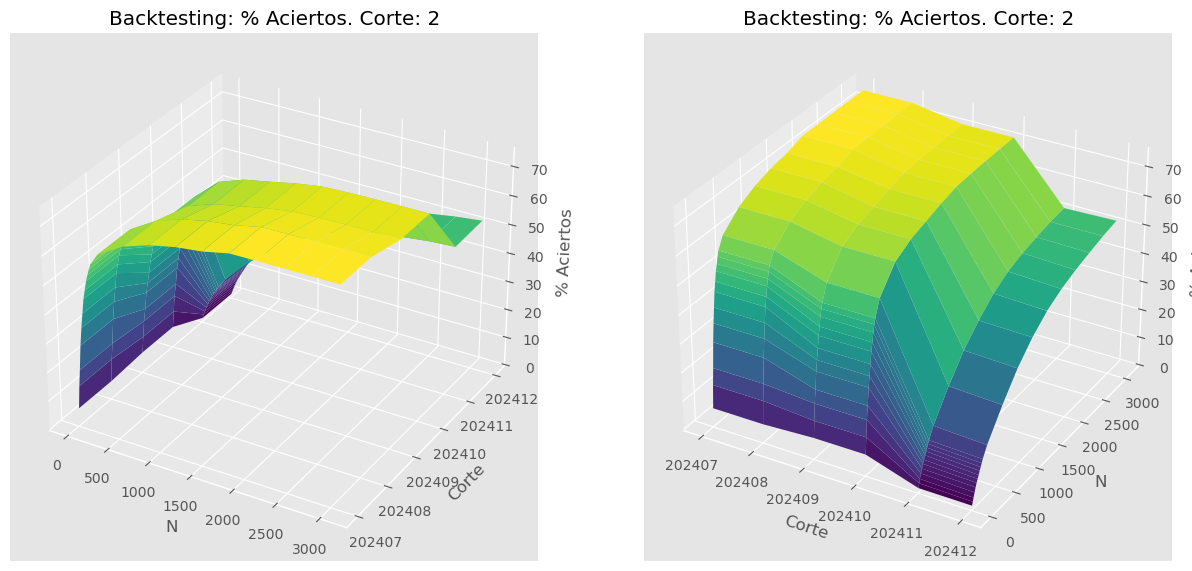

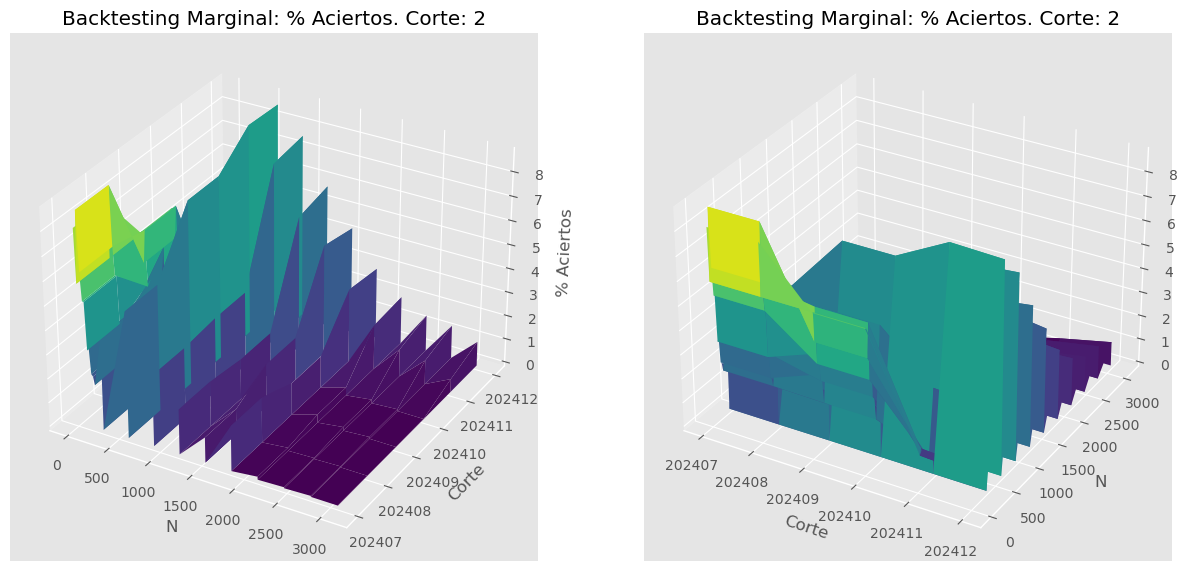

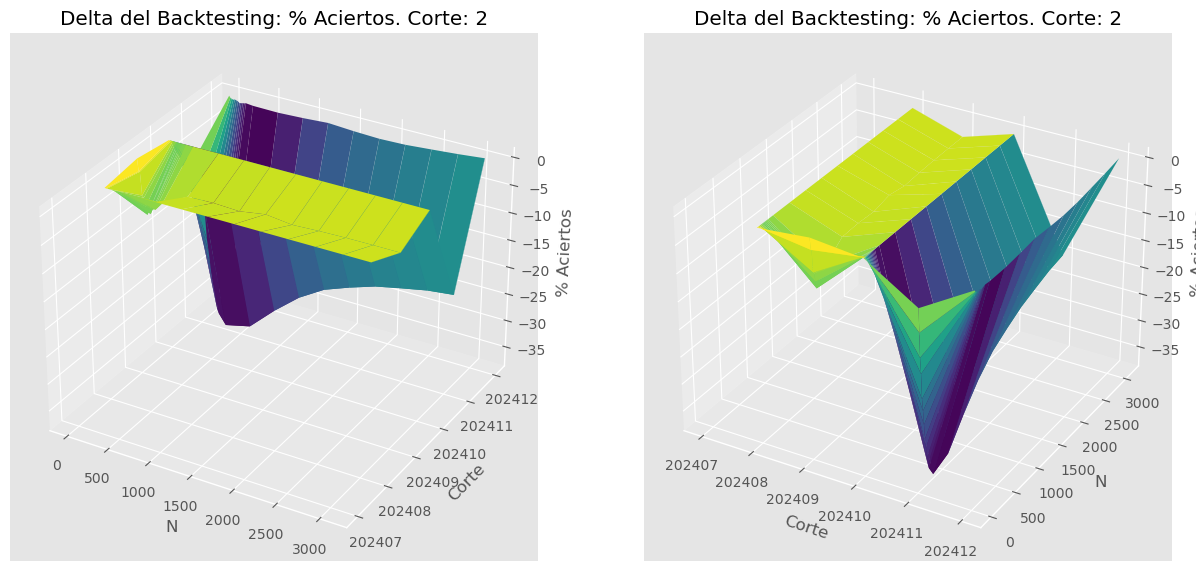

In [433]:
title = ['Backtesting','Backtesting Marginal','Delta del Backtesting']
for t,altura in enumerate([z2,z2.diff(),z2.diff(axis=1)]):
    # Crear subgráficos con 1 fila y 2 columnas
    fig, axs = plt.subplots(1, 2, figsize=(15, 15), subplot_kw={'projection': '3d'})
    
    # Primer gráfico: a la izquierda
    ax1 = axs[0]
    ax1.plot_surface(y1, x1, altura, cmap='viridis')
    ax1.set_title(f'{title[t]}: {z_name}. Corte: {rezago}')
    ax1.set_xlabel(f'{y_name}')
    ax1.set_ylabel(f'{x_name}')
    ax1.set_zlabel(f'{z_name}')
    ax1.set_yticks([int(i) for i in cortes_totales2])
    ax1.set_yticklabels([f'{i}' for i in cortes_totales2])
    
    # Segundo gráfico: a la derecha
    ax2 = axs[1]
    ax2.plot_surface(x1, y1, altura, cmap='viridis')
    ax2.set_title(f'{title[t]}: {z_name}. Corte: {rezago}')
    ax2.set_xlabel(f'{x_name}')
    ax2.set_ylabel(f'{y_name}')
    ax2.set_zlabel(f'{z_name}')
    ax2.set_xticks([int(i) for i in cortes_totales2])
    ax2.set_xticklabels([f'{i}' for i in cortes_totales2])
    # Mostrar el gráfico
    plt.show()